# 📊 Analyse des données ArXiv

## 🔍 Aperçu du dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'classifier/data/sci_papers.csv'
df = pd.read_csv(file_path)
print(f"shape du dataset : {df.shape}")
df.head()

shape du dataset : (136238, 10)


,id,title,category,category_code,published_date,updated_date,authors,first_author,summary,summary_word_count
0,cs-9308101v1,Dynamic Backtracking,Artificial Intelligence,cs.AI,8/1/93,8/1/93,['M. L. Ginsberg'],'M. L. Ginsberg',Because of their occasional need to return to ...,79
1,cs-9308102v1,A Market-Oriented Programming Environment and ...,Artificial Intelligence,cs.AI,8/1/93,8/1/93,['M. P. Wellman'],'M. P. Wellman',Market price systems constitute a well-underst...,119
2,cs-9309101v1,An Empirical Analysis of Search in GSAT,Artificial Intelligence,cs.AI,9/1/93,9/1/93,"['I. P. Gent', 'T. Walsh']",'I. P. Gent',We describe an extensive study of search in GS...,167
3,cs-9311101v1,The Difficulties of Learning Logic Programs wi...,Artificial Intelligence,cs.AI,11/1/93,11/1/93,"['F. Bergadano', 'D. Gunetti', 'U. Trinchero']",'F. Bergadano',As real logic programmers normally use cut (!)...,174
4,cs-9311102v1,Software Agents: Completing Patterns and Const...,Artificial Intelligence,cs.AI,11/1/93,11/1/93,"['J. C. Schlimmer', 'L. A. Hermens']",'J. C. Schlimmer',To support the goal of allowing users to recor...,187


In [ ]:
print("Statistiques des colonnes numériques:")
df.describe()

Statistiques des colonnes numériques:


,published_date,updated_date,summary_word_count,year,num_authors,days_to_update
count,136238,136238,136238.000000,136238.000000,136238.000000,136238.000000
mean,2019-10-24 05:23:09.550639104,2020-01-29 19:56:22.051997440,162.386830,2019.307425,3.977282,97.606395
min,1993-08-01 00:00:00,1993-08-01 00:00:00,1.000000,1993.000000,1.000000,0.000000
25%,2018-03-02 00:00:00,2018-05-22 00:00:00,128.000000,2018.000000,2.000000,0.000000
50%,2020-06-29 00:00:00,2020-11-09 00:00:00,160.000000,2020.000000,4.000000,0.000000
75%,2022-09-20 00:00:00,2022-12-10 00:00:00,195.000000,2022.000000,5.000000,110.000000
max,2025-01-30 00:00:00,2025-01-30 00:00:00,552.000000,2025.000000,1137.000000,6151.000000
std,NaN,NaN,49.374474,4.131273,4.232458,224.093258


Note : la colonne num_authors est incohérente et traitée ci dessous

In [41]:
print(f"\n Il y a {len(df.category.unique())} catégories")
list(df.category.unique())



 Il y a 138 catégories


['Artificial Intelligence',
 'Disordered Systems and Neural Networks',
 'Computational Complexity',
 'Logic in Computer Science',
 'Multiagent Systems',
 'Information Retrieval',
 'Robotics',
 'Databases',
 'Machine Learning',
 'Computation and Language (Natural Language Processing)',
 'Programming Languages',
 'Distributed, Parallel, and Cluster Computing',
 'Performance',
 'Neural and Evolutionary Computing',
 'Computational Engineering, Finance, and Science',
 'Computational Geometry',
 'Networking and Internet Architecture',
 'Computer Science and Game Theory',
 'Computer Vision and Pattern Recognition',
 'Human-Computer Interaction',
 'Cryptography and Security',
 'Other Computer Science',
 'Software Engineering',
 'Discrete Mathematics',
 'Mathematical Software',
 'Data Structures and Algorithms',
 'Computers and Society',
 'Logic',
 'Adaptation and Self-Organizing Systems',
 'Quantitative Methods in Biology',
 'Quantum Physics',
 'Digital Libraries',
 'Neurons and Cognition',
 '

In [43]:
all_authors = []
for authors_str in df['authors']:
    authors_list = eval(authors_str)
    all_authors.extend(authors_list)

unique_authors = len(set(all_authors))
print(f"Nombre total d'auteurs uniques : {unique_authors}")

Nombre total d'auteurs uniques : 197018


## 📂 Répartition des disciplines scientifiques
Voyons quelles sont les catégories les plus populaires dans notre dataset.

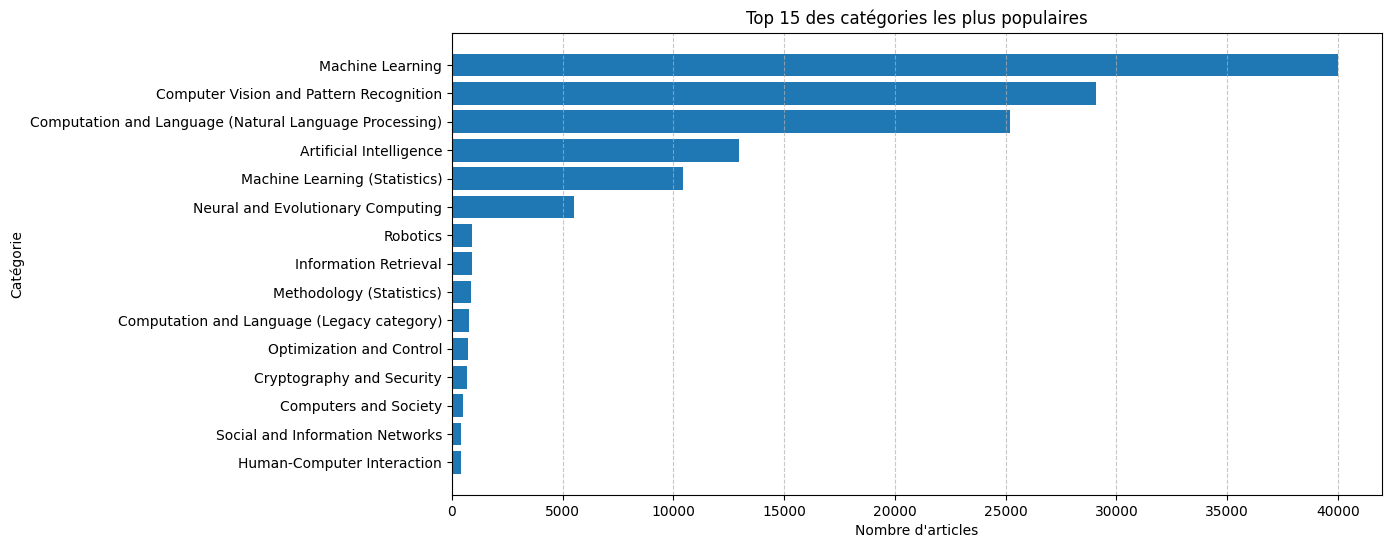

In [53]:
category_counts = df['category'].value_counts().head(15)
plt.figure(figsize=(12, 6))
plt.barh(category_counts.index[::-1], category_counts.values[::-1])
plt.xlabel("Nombre d'articles")
plt.ylabel("Catégorie")
plt.title("Top 15 des catégories les plus populaires")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## 📈 Évolution du nombre de publications
Analysons comment le nombre d'articles évolue au fil des années.

C:\Users\cheri\AppData\Local\Temp\ipykernel_5456\1353377522.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')


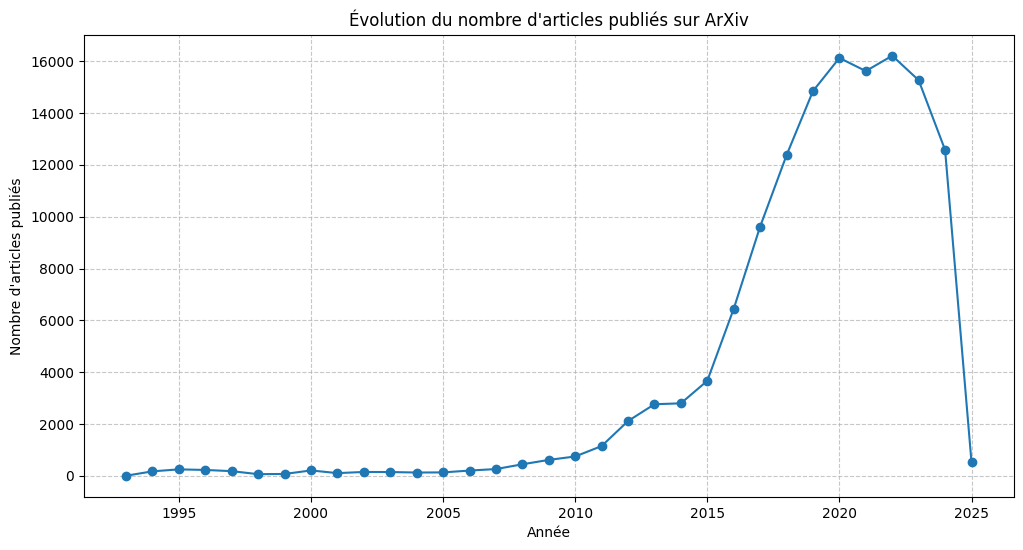

In [7]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['year'] = df['published_date'].dt.year
yearly_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.xlabel("Année")
plt.ylabel("Nombre d'articles publiés")
plt.title("Évolution du nombre d'articles publiés sur ArXiv")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 📝 Distribution de la longueur des résumés par catégorie
Certaines disciplines nécessitent des résumés plus détaillés que d'autres.

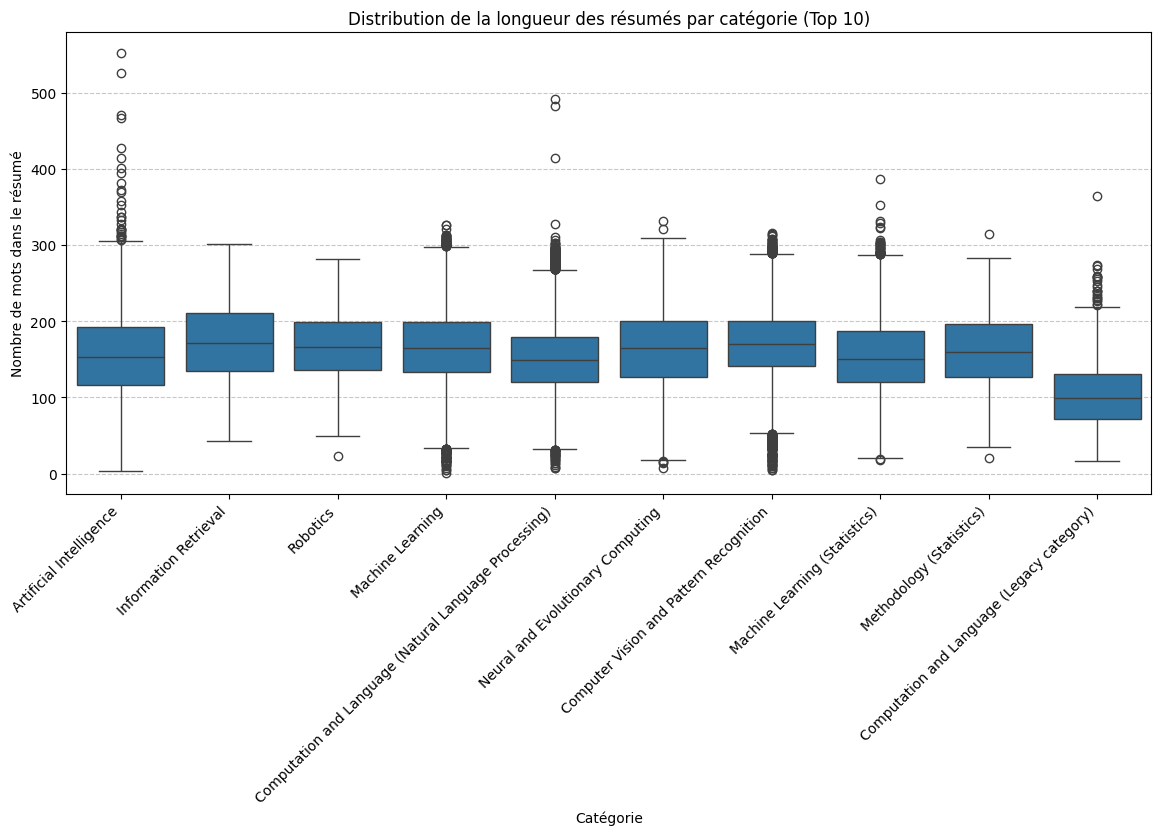

In [8]:
df['summary_word_count'] = df['summary_word_count'].astype(int)
top_categories = df['category'].value_counts().head(10).index
df_top_categories = df[df['category'].isin(top_categories)]
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_categories, x='category', y='summary_word_count')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Catégorie")
plt.ylabel("Nombre de mots dans le résumé")
plt.title("Distribution de la longueur des résumés par catégorie (Top 10)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 🤝 Nombre moyen d'auteurs par catégorie
Voyons quelles disciplines ont tendance à être plus collaboratives.

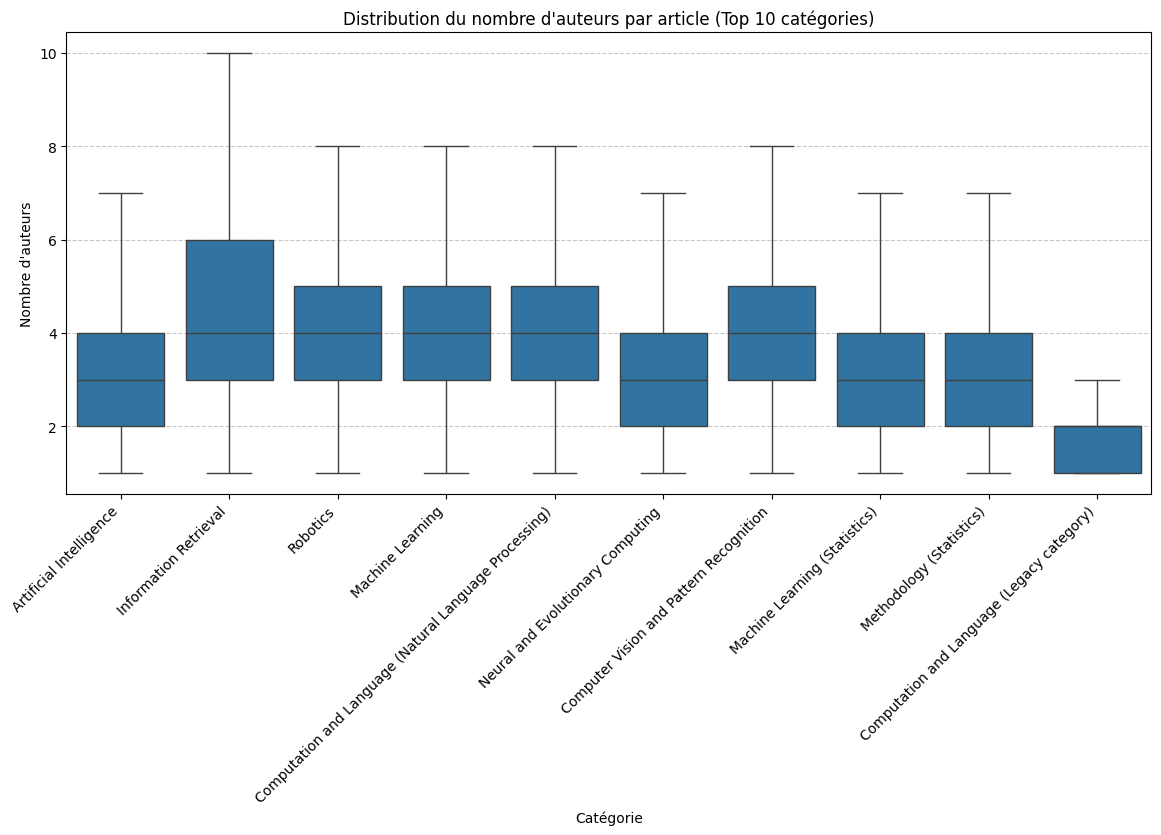

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_categories, x='category', y='num_authors', showfliers=False)  # Remove outliers for better visibility
plt.xticks(rotation=45, ha='right')
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'auteurs")
plt.title("Distribution du nombre d'auteurs par article (Top 10 catégories)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 🛠️ Exploitation et perspectives

Pistes à explorer :
- 🤖 Classification supervisée des articles par catégorie depuis leur titre ou résumé
- 📊 Clustering non supervisé des articles 
- 🔄 Analyse des collaborations scientifiques via des algorithmes de graphes 
- 📈 Prédiction des tendances de la recherche avec des modèles de séries temporelles
- ✨ etc.